# 06 - Bonus

## Gradient Descent With Two Parameters

Try to implement the gradient descent algorithm for linear regression, like you did in previous exercises, but optimizing the two parameters `theta0` and `theta1`.

💡Be careful, the derivative of the cost function is not the same for both parameters because we differentiate with respect to each variable separately!

In [ ]:
# Your code here


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output


In [23]:
data = pd.read_csv("../data/ciqual_small.csv")

In [24]:
import h5py

hf = h5py.File('../data/data_exercises.h5', 'r')

cost_all = np.array(hf.get('cost_all'))
best_params = np.array(hf.get('best_params'))
theta0_grid = np.array(hf.get('theta0_grid'))
theta1_grid = np.array(hf.get('theta1_grid'))

hf.close()

In [25]:
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    m = x.shape[0]
    return (1 / (2 * m)) * np.sum((y_hat - y) ** 2)

def plot_reg_line(x, y, theta0, theta1):
    x_line = np.arange(x.min() - x.min() / 10,
                       x.max() + x.max() / 10,
                      0.1)
    y_line = theta0 + theta1 * x_line

    sns.scatterplot(x, y)
    plt.plot(x_line, y_line)
    
def plot_cost_history(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")

def gradient_descent_viz(x, y, theta0, theta1):
    cost_for_theta1 = L(x, y, theta0, theta1)
    
    plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    
    ax1.plot(theta1_grid, cost_all[best_params[0]])
    ax1.scatter(theta1, cost_for_theta1)

    plot_reg_line(x, y, theta0, theta1)

    plt.show()
    plt.close()

    print(f"Cost: {cost_for_theta1}")
    
    time.sleep(0.5)
    clear_output(wait=True)
    

In [26]:
def cost_function_derivative(x, y, theta0, theta1):
    m = x.shape[0]
    derivative_theta0 = (1 / m) * np.sum((h(x, theta0, theta1) - y))
    derivative_theta1 = (1 / m) * np.sum((h(x, theta0, theta1) - y) * x)
    return derivative_theta0, derivative_theta1


In [27]:
def update_lr(x, y, theta0, theta1, alpha):
    derivative_theta0, derivative_theta1 = cost_function_derivative(x, y, theta0, theta1)
    new_theta0 = theta0 - alpha * derivative_theta0
    new_theta1 = theta1 - alpha * derivative_theta1
    return new_theta0, new_theta1

In [28]:
def gradient_descent_lr(x, y, theta0, theta1, alpha, num_epochs=5, viz=True):
    cost_history = []
    counter = 0
    for epoch in range(num_epochs):
        cost_for_theta1 = L(x, y, theta0, theta1)
        cost_history.append(cost_for_theta1)
                    
        if viz:
            gradient_descent_viz(x, y, theta0, theta1)
            
        counter += 1
        theta0, theta1 = update_lr(x, y, theta0, theta1, alpha)
        
    print(f"theta0: {theta0}, theta1: {theta1}, last cost: {cost_for_theta1}")
    return cost_history, theta0, theta1

In [29]:
cost_history, best_theta0, best_theta1 = gradient_descent_lr(x=data['Zinc (mg/100g)'],
                                             y=data['Phosphorus (mg/100g)'],
                                             theta0=50,
                                             theta1=-300,
                                             alpha=0.1,
                                             num_epochs=500,
                                             viz=False)

theta0: 13.839045972163426, theta1: 105.93281804072481, last cost: 3054.384160124626


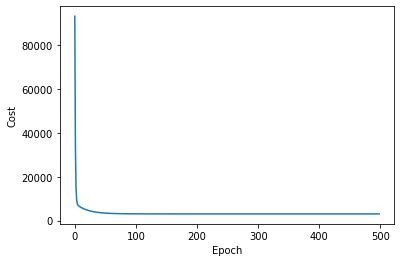

In [30]:
plot_cost_history(cost_history[1:])

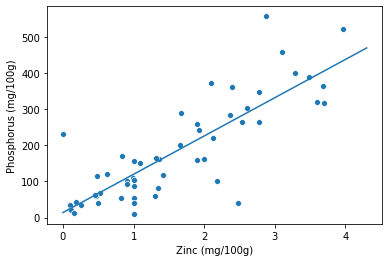

In [31]:
plot_reg_line(x=data['Zinc (mg/100g)'],
              y=data['Phosphorus (mg/100g)'],
              theta0=best_theta0,
              theta1=best_theta1)

## Gradient Descent With Sklearn

Try to compare the results you got from your manual gradient descent implementation with gradient descent implemented in Sklearn.

In [33]:
# Your code here


In [34]:
from sklearn import linear_model

X = data['Zinc (mg/100g)'].values.reshape(-1, 1)
Y = data['Phosphorus (mg/100g)'].values

clf = linear_model.SGDRegressor(max_iter=500, tol=0.1, fit_intercept=True, alpha=0.01)

clf.fit(X, Y)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
L(x=data['Zinc (mg/100g)'],
  y=data['Phosphorus (mg/100g)'],
  theta0=clf.intercept_,
  theta1=clf.coef_)

3059.4382325209244